In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import numpy as np

In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

def my_model():
    inputs = keras.layers.Input(shape=(28,28,1))
    x = keras.layers.ZeroPadding2D(padding=(1,1),input_shape=(28,28,1))(inputs)
    x = keras.layers.Conv2D(32,3)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = keras.layers.MaxPooling2D(pool_size=2,strides=2)(x)
    x = keras.layers.ZeroPadding2D(padding=(1,1))(x)
    x = keras.layers.Dropout(0.1)(x)

    
    x = keras.layers.Conv2D(64,3)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = keras.layers.MaxPooling2D(pool_size=2,strides=2)(x)
    x = keras.layers.Dropout(0.2)(x)
    

    x = keras.layers.Conv2D(256,3)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = keras.layers.MaxPooling2D(pool_size=2,strides=2)(x)
    x = keras.layers.Dropout(0.3)(x)
    
    
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128,activation='relu')(x)
    outputs = keras.layers.Dense(10,activation='softmax')(x)
    x = keras.layers.Dropout(0.4)(x)
    
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model
    
    
    
    
model = my_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 30, 30, 1)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0     

In [13]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 107s 224ms/step - loss: 0.1934 - accuracy: 0.9400 - val_loss: 5.1295 - val_accuracy: 0.0974
Epoch 2/20
469/469 [==============================] - 105s 224ms/step - loss: 0.0623 - accuracy: 0.9805 - val_loss: 15.9279 - val_accuracy: 0.0974
Epoch 3/20
469/469 [==============================] - 102s 218ms/step - loss: 0.0487 - accuracy: 0.9847 - val_loss: 21.9632 - val_accuracy: 0.0974
Epoch 4/20
469/469 [==============================] - 109s 233ms/step - loss: 0.0407 - accuracy: 0.9874 - val_loss: 21.1121 - val_accuracy: 0.1010
Epoch 5/20
469/469 [==============================] - 109s 232ms/step - loss: 0.0339 - accuracy: 0.9888 - val_loss: 48.7343 - val_accuracy: 0.0974
Epoch 6/20
219/469 [=============>................] - ETA: 1:00 - loss: 0.0318 - accuracy: 0.9895

KeyboardInterrupt: 

In [4]:
# Save the trained model
model.save(r"D:\mlh-project\digit_recognition_model\digit_recognition_model")

INFO:tensorflow:Assets written to: digit_recognition_model\assets


INFO:tensorflow:Assets written to: digit_recognition_model\assets


In [19]:
# Load the saved model
# model = tf.keras.models.load_model(r"D:\mlh-project\digit_recognition_model\digit_recognition_model")

# Load and preprocess a new image
new_image = cv2.imread(r"C:\Users\Lakshmi\Downloads\three.jpg", cv2.IMREAD_GRAYSCALE)
new_image = cv2.resize(new_image, (28, 28))
new_image = new_image.astype("float32") / 255.0
new_image = np.expand_dims(new_image, axis=0)
new_image = np.expand_dims(new_image, axis=-1)

# Perform prediction on the new image
prediction = model.predict(new_image)
predicted_digit = np.argmax(prediction)

print("Predicted digit:", predicted_digit)
# test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
# print("Test accuracy:", test_acc)

1/1 [==============================] - 0s 49ms/step
Predicted digit: 6


In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import joblib

# Load the MNIST dataset
digits = datasets.load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = svm.SVC()

# Train the classifier
clf.fit(X_train, y_train)

# Predict the digits for the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
model_path = 'model.pkl'
joblib.dump(clf, model_path)


Accuracy: 0.9861111111111112


['model.pkl']

In [21]:
from PIL import Image
import numpy as np
from sklearn import svm
import joblib

# Load the image
image_path = r"C:\Users\Lakshmi\Downloads\three.jpg"
image = Image.open(image_path)

# Preprocess the image
image = image.convert('L')  # Convert to grayscale
image = image.resize((8, 8))  # Resize to match MNIST image size
image = np.array(image)  # Convert to numpy array
image = image.flatten()  # Flatten the image

# Load the trained SVM model
model_path = r"C:\Users\Lakshmi\model.pkl"
clf = svm.SVC()
clf = joblib.load(model_path)

# Make a prediction
prediction = clf.predict([image])

print("Predicted Digit:", prediction[0])

Predicted Digit: 1


In [22]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
print(model.summary())

553467096/553467096 [==============================] - 335s 1us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                          

In [23]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

img_path = '/kaggle/input/images/dog.jpg'
#There is an interpolation method to match the source size with the target size
#image loaded in PIL (Python Imaging Library)
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
display(img)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/images/dog.jpg'

In [ ]:
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

In [ ]:
#mean centering with respect to Image
x = preprocess_input(x)
features = model.predict(x)
p = decode_predictions(features)

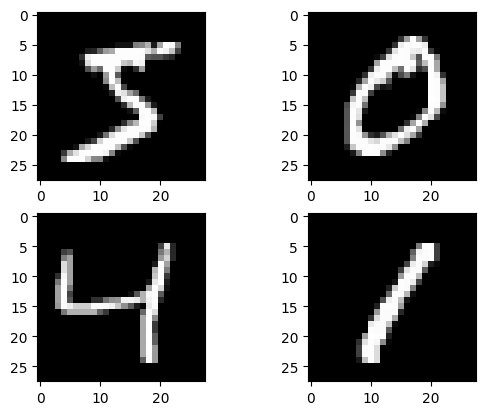

In [24]:

# Plot ad hoc mnist instances
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [25]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [27]:
#flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [28]:
X_train = X_train / 255
X_test = X_test / 255

In [29]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [30]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_shape=(num_pixels,), kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [42]:

# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 7s - loss: 0.2790 - accuracy: 0.9204 - val_loss: 0.1324 - val_accuracy: 0.9612 - 7s/epoch - 22ms/step
Epoch 2/10
300/300 - 5s - loss: 0.1109 - accuracy: 0.9675 - val_loss: 0.0959 - val_accuracy: 0.9721 - 5s/epoch - 15ms/step
Epoch 3/10
300/300 - 4s - loss: 0.0706 - accuracy: 0.9795 - val_loss: 0.0857 - val_accuracy: 0.9742 - 4s/epoch - 14ms/step
Epoch 4/10
300/300 - 4s - loss: 0.0500 - accuracy: 0.9856 - val_loss: 0.0667 - val_accuracy: 0.9790 - 4s/epoch - 15ms/step
Epoch 5/10
300/300 - 6s - loss: 0.0365 - accuracy: 0.9894 - val_loss: 0.0650 - val_accuracy: 0.9793 - 6s/epoch - 18ms/step
Epoch 6/10
300/300 - 5s - loss: 0.0260 - accuracy: 0.9933 - val_loss: 0.0654 - val_accuracy: 0.9786 - 5s/epoch - 18ms/step
Epoch 7/10
300/300 - 5s - loss: 0.0187 - accuracy: 0.9957 - val_loss: 0.0581 - val_accuracy: 0.9815 - 5s/epoch - 16ms/step
Epoch 8/10
300/300 - 6s - loss: 0.0143 - accuracy: 0.9967 - val_loss: 0.0690 - val_accuracy: 0.9786 - 6s/epoch - 19ms/step
Epoch 9/10
300/3

In [35]:
# model.save( r"C:\Users\Lakshmi\mlh-models")
# print("Model saved successfully.")

INFO:tensorflow:Assets written to: C:\Users\Lakshmi\mlh-models\assets
Model saved successfully.


In [36]:
# loaded_model = Sequential()
# loaded_model = loaded_model.load_weights(r"C:\Users\Lakshmi\mlh-models")
# print("Model loaded successfully.")

AssertionError: Nothing to load. No dependencies have been added to <keras.engine.sequential.Sequential object at 0x0000027CD7A3ABE0> yet.

In [40]:
digit_image = Image.open(r"C:\Users\Lakshmi\Downloads\two.jpg").convert("L")  # Convert to grayscale
digit_image = digit_image.resize((28, 28))  # Resize to 28x28
digit_array = np.array(digit_image)
digit_array = digit_array.reshape(1, num_pixels).astype('float32')
digit_array = digit_array / 255

# Use the loaded model to predict the digit
prediction = model.predict(digit_array)
predicted_digit = np.argmax(prediction)

print("Predicted Digit:", predicted_digit)

1/1 [==============================] - 0s 66ms/step
Predicted Digit: 5


In [41]:
digit_image = Image.open(r"C:\Users\Lakshmi\Downloads\two.jpg").convert("L")  # Convert to grayscale
digit_image = digit_image.resize((28, 28))  # Resize to 28x28
digit_array = np.array(digit_image)
digit_array = digit_array.reshape(1, num_pixels).astype('float32')
digit_array = digit_array / 255

# Use the loaded model to predict the digit
prediction = model.predict(digit_array)
predicted_digit = np.argmax(prediction)

print("Predicted Digit:", predicted_digit)

1/1 [==============================] - 0s 62ms/step
Predicted Digit: 5


In [32]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_shape=(num_pixels,), kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 3s - loss: 0.2801 - accuracy: 0.9195 - val_loss: 0.1400 - val_accuracy: 0.9605 - 3s/epoch - 10ms/step
Epoch 2/10
300/300 - 2s - loss: 0.1112 - accuracy: 0.9681 - val_loss: 0.0998 - val_accuracy: 0.9696 - 2s/epoch - 7ms/step
Epoch 3/10
300/300 - 2s - loss: 0.0723 - accuracy: 0.9791 - val_loss: 0.0758 - val_accuracy: 0.9764 - 2s/epoch - 6ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0506 - accuracy: 0.9848 - val_loss: 0.0686 - val_accuracy: 0.9782 - 2s/epoch - 6ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0369 - accuracy: 0.9894 - val_loss: 0.0626 - val_accuracy: 0.9805 - 2s/epoch - 6ms/step
Epoch 6/10
300/300 - 2s - loss: 0.0273 - accuracy: 0.9925 - val_loss: 0.0637 - val_accuracy: 0.9799 - 2s/epoch - 6ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0196 - accuracy: 0.9949 - val_loss: 0.0603 - val_accuracy: 0.9804 - 2s/epoch - 7ms/step
Epoch 8/10
300/300 - 2s - loss: 0.0141 - accuracy: 0.9969 - val_loss: 0.0612 - val_accuracy: 0.9811 - 2s/epoch - 6ms/step
Epoch 9/10
300/300 - 2s

In [1]:
# VGG19

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [3]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg19', pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to C:\Users\Lakshmi/.cache\torch\hub\v0.10.0.zip
C:\Users\Lakshmi\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Lakshmi\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\Lakshmi/.cache\torch\hub\checkpoints\vgg19-dcbb9e9d.pth
100%|███████████████████████████████████████████████████████████████████████████████| 548M/548M [04:20<00:00, 2.21MB/s]


In [4]:
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [5]:
train_dataset = MNIST(root="./data", train=True, transform=ToTensor(), download=True)
test_dataset = MNIST(root="./data", train=False, transform=ToTensor())

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:03<00:00, 2591581.06it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 12889518.39it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 3371944.26it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 4564094.10it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = VGG19().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [8]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

RuntimeError: Given groups=1, weight of size [64, 3, 3, 3], expected input[64, 1, 28, 28] to have 3 channels, but got 1 channels instead

In [9]:
# MLM 

In [13]:
# # save the final model to file
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D
# from tensorflow.keras.layers import MaxPooling2D
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.optimizers import SGD
 
# # load train and test dataset
# def load_dataset():
#     (trainX, trainY), (testX, testY) = mnist.load_data()
#  # reshape dataset to have a single channel
#     trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
#     testX = testX.reshape((testX.shape[0], 28, 28, 1))
#  # one hot encode target values
#     trainY = to_categorical(trainY)
#     testY = to_categorical(testY)
#     return trainX, trainY, testX, testY
 
# # scale pixels
# def prep_pixels(train, test):
#     train_norm = train.astype('float32')
#     test_norm = test.astype('float32')
#  # normalize to range 0-1
#     train_norm = train_norm / 255.0
#     test_norm = test_norm / 255.0
#  # return normalized images
#     return train_norm, test_norm
 
# # define cnn model
# def define_model():
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
#     model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
#     model.add(Dense(10, activation='softmax'))
#  # compile model
#     opt = SGD(learning_rate=0.01, momentum=0.9)
#     model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#     return model
 
# # run the test harness for evaluating a model
# def run_test_harness():
#     trainX, trainY, testX, testY = load_dataset()
#     trainX, testX = prep_pixels(trainX, testX)
#     model = define_model()
#     model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
#     model.save('final_model.h5')
 

# run_test_harness()


from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
 
# load train and test dataset
def load_dataset():
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# run the test harness for evaluating a model
def run_test_harness():
    trainX, trainY, testX, testY = load_dataset()
    print("load completed")
    trainX, testX = prep_pixels(trainX, testX)
    print("prepare pixels completed")
    model = define_model()
    print("model defined")
    model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
    print("model fit")
    model.save('final_model.h5')
    print("model saved")
 

In [14]:
run_test_harness()

load completed
prepare pixels completed
model defined
model fit
model saved


In [ ]:
"C:\Users\Lakshmi\Downloads\seven.png"

In [15]:
# make a prediction for a new image.
from numpy import argmax
from keras.utils import load_img
from keras.utils import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    img = img_to_array(img)
 # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
 # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img
 
# load an image and predict the class
def run_example():
    img = load_image(r"C:\Users\Lakshmi\Downloads\nine-draw.jpg")
 # load model
    model = load_model('final_model.h5')
    predict_value = model.predict(img)
    digit = argmax(predict_value)
    print(digit)
 



In [16]:
run_example()

1/1 [==============================] - 0s 253ms/step
7


In [7]:
from numpy import argmax
from keras.utils import load_img
from keras.utils import img_to_array

In [8]:
from keras.models import load_model

In [9]:
 model = load_model('final_model.h5')

In [10]:
img = load_image(r"C:\Users\Lakshmi\Downloads\seven-draw.jpg")
predict_value = model.predict(img)
digit = argmax(predict_value)
print(digit)

NameError: name 'load_image' is not defined